# Proyek Pertama: Menyelesaikan Permasalahan Human Resources

- Nama: Nafa Khairunnisa
- Email: nkhairunn2412@gmail.com
- Id Dicoding: nafa-khairunnisa

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Libraries yang umum digunakan
import pandas as pd
import seaborn as sns
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

In [2]:
# Libraries untuk data preparation
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
# Libraries untuk modeling
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
!pip freeze > requirements.txt

### Menyiapkan data yang akan digunakan

In [5]:
# Data Loading
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv"
df = pd.read_csv(url)

df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

Data understanding dilakukan untuk memahami da eksplorasi data untuk mendapatkan informasi yang berguna dari dataset.

In [6]:
# Deskripsi variabel
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

**Insight**:

- Dataset memiliki 1470 sampel.
- Terdiri dari 35 fitur (1 float, 26 int, dan 8 object)
- Fitur attrition adalah label target.

In [8]:
# Cek data duplikat
df_duplicated = df.duplicated().sum()
print("Jumlah data duplikat = ", df_duplicated)

# Cek missing value
df.isna().sum()

Jumlah data duplikat =  0


,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


Insights:

- Dataset tidak memiliki sampel duplikat.
- Missing value ada pada kolom attrition (karyawan resign atau tidak) sebanyak 412.

In [9]:
# Cek nilai unique
df.nunique()

,0
EmployeeId,1470
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1


In [10]:
# Cek nilai unique

# Attrition
print("Attrition :", df['Attrition'].unique())

# BusinessTravel
print("BusinessTravel :", df['BusinessTravel'].unique())

# Department
print("Department :", df['Department'].unique())

# EducationField
print("EducationField :", df['EducationField'].unique())

# Gender
print("Gender :", df['Gender'].unique())

# JobRole
print("JobRole :", df['JobRole'].unique())

# MaritalStatus
print("MaritalStatus :", df['MaritalStatus'].unique())

# OverTime
print("OverTime :", df['OverTime'].unique())

# PerformanceRating
print("PerformanceRating :", df['PerformanceRating'].unique())

Attrition : [nan  1.  0.]
BusinessTravel : ['Travel_Frequently' 'Travel_Rarely' 'Non-Travel']
Department : ['Human Resources' 'Research & Development' 'Sales']
EducationField : ['Other' 'Medical' 'Life Sciences' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Male' 'Female']
JobRole : ['Human Resources' 'Healthcare Representative' 'Research Scientist'
 'Sales Executive' 'Manager' 'Laboratory Technician' 'Research Director'
 'Manufacturing Director' 'Sales Representative']
MaritalStatus : ['Married' 'Single' 'Divorced']
OverTime : ['Yes' 'No']
PerformanceRating : [3 4]


### EDA

Exploratory Data Analysis dilakukan untuk mengeksplor data dan mencari pengetahuan dari data. Pada kasus ini, tujuannya untuk mengetahui fitur apa saja yang berpengaruh pada distribusi attrition.

#### Univariate Analysis

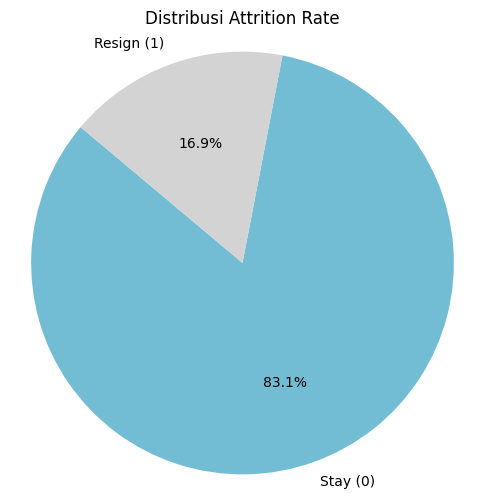

In [11]:
# Cek distribusi attrition

# Hitung jumlah masing-masing kategori attrition
attrition_counts = df['Attrition'].value_counts()
labels = ['Stay (0)', 'Resign (1)']
colors = ["#72BCD4", "#D3D3D3"]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(attrition_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribusi Attrition Rate')
plt.axis('equal')
plt.show()

**Insight**:

Karyawan yang resign memiliki persentase 16.9% dari keseluruhan karyawan.

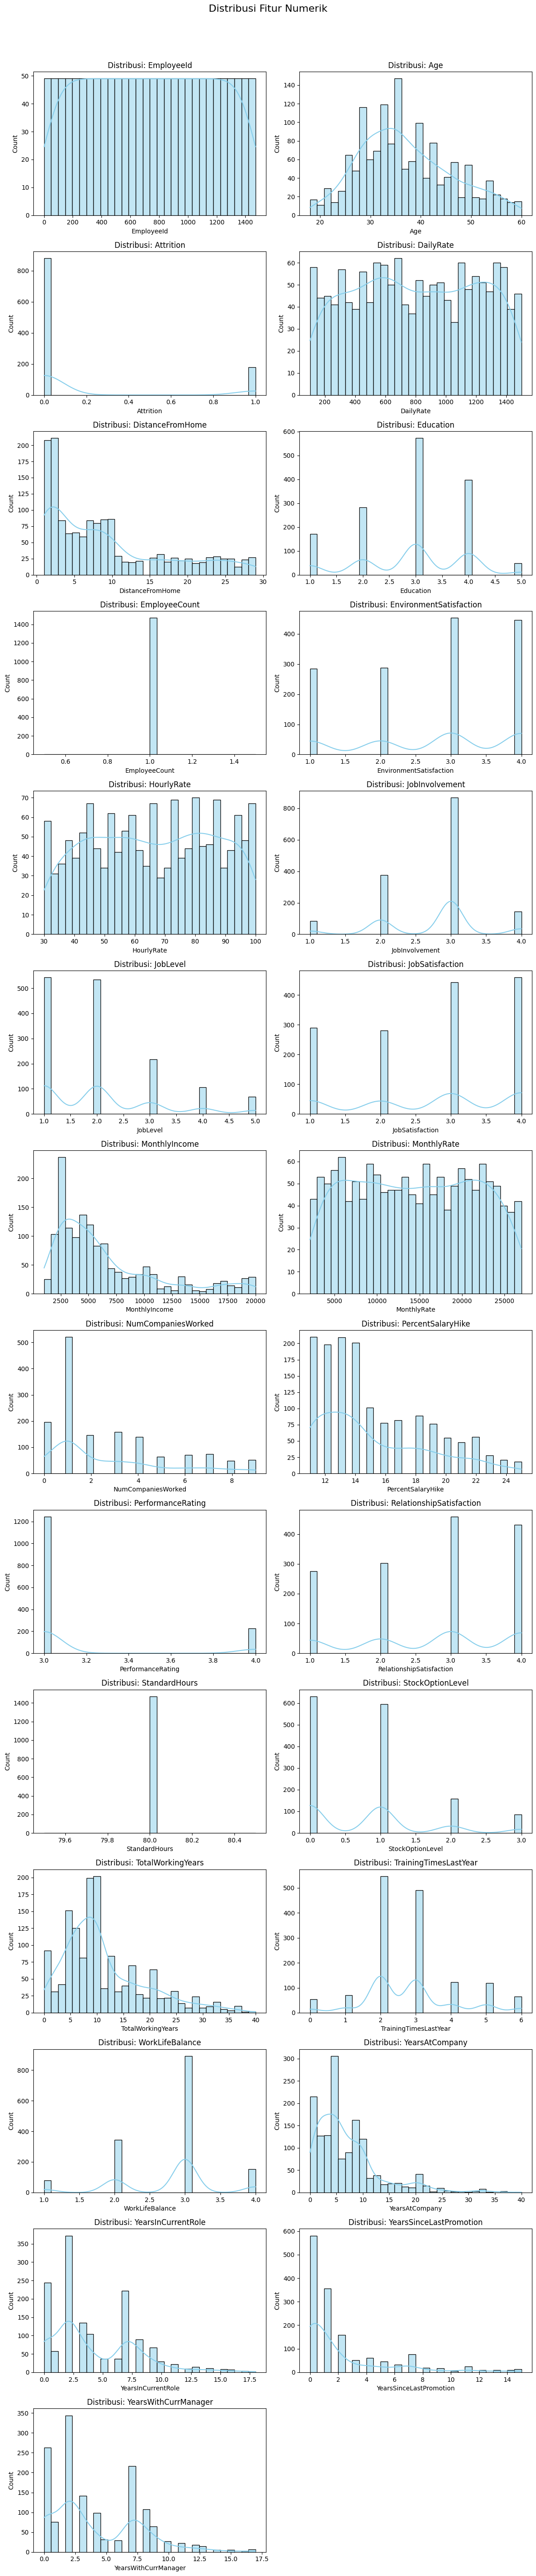

In [12]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Cek distribusi nilai numerik
n_cols = 2
n_rows = (len(numerical_cols) + 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))
axes = axes.flatten()

# Plot setiap fitur
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, color='skyblue', bins=30, ax=axes[i])
    axes[i].set_title(f'Distribusi: {col}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Distribusi Fitur Numerik', fontsize=16, y=1.02)
plt.show()

**Insights**:

1. Fitur MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion, YearsInCurrentRole, YearsWithCurrManager skew kanan (positif)
2. Fitur Age dan HourlyRate memiliki distribusi yang normal.
3. Fitur EmployeeID, DailyRate, MonthlyRate memiliki distribusi acak.

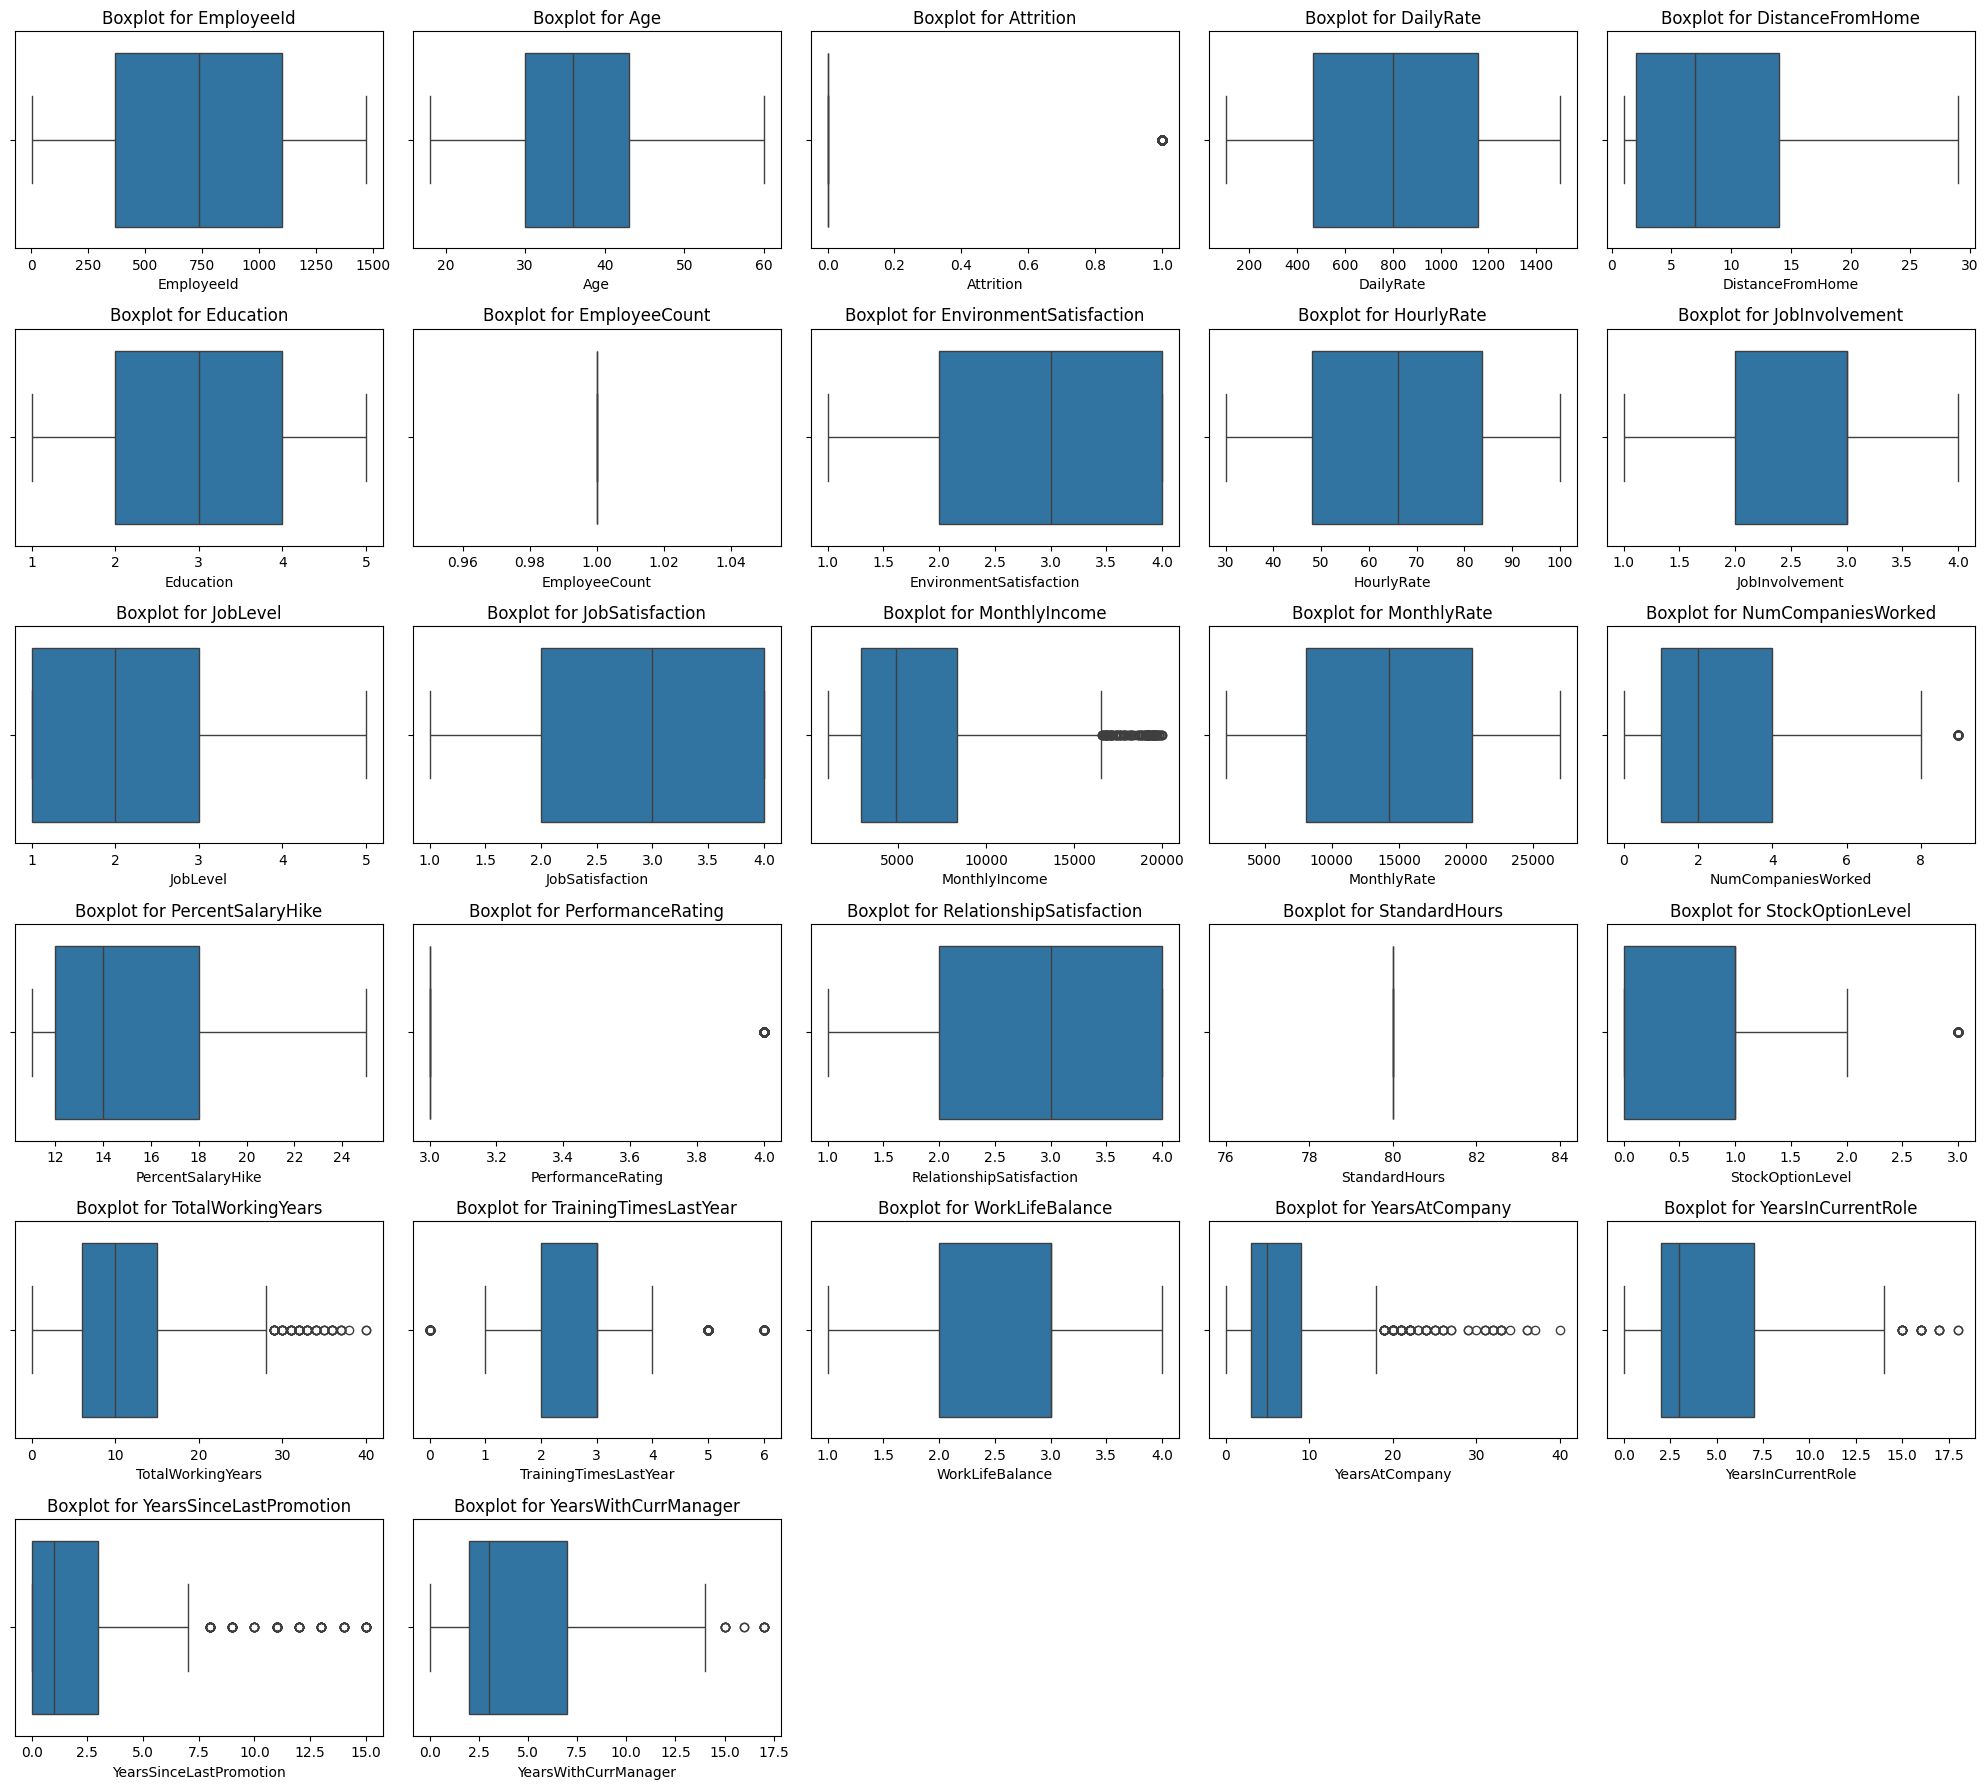

In [13]:
# Cek outliers kolom numerik
n_cols = 5
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(n_cols * 4, n_rows * 3))  # Ukuran figure dinamis
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])  # pakai x biar horizontal
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

**Insights**:

- Berdasarkan boxplot di atas, terdapat beberapa outlier yang perlu ditangani di antaranya: MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager, YearsSinceLastPromotion, NumCompaniesWorked, dan PercentSalaryHike.
- Kolom lainnya aman karena tidak memiliki ouliers.

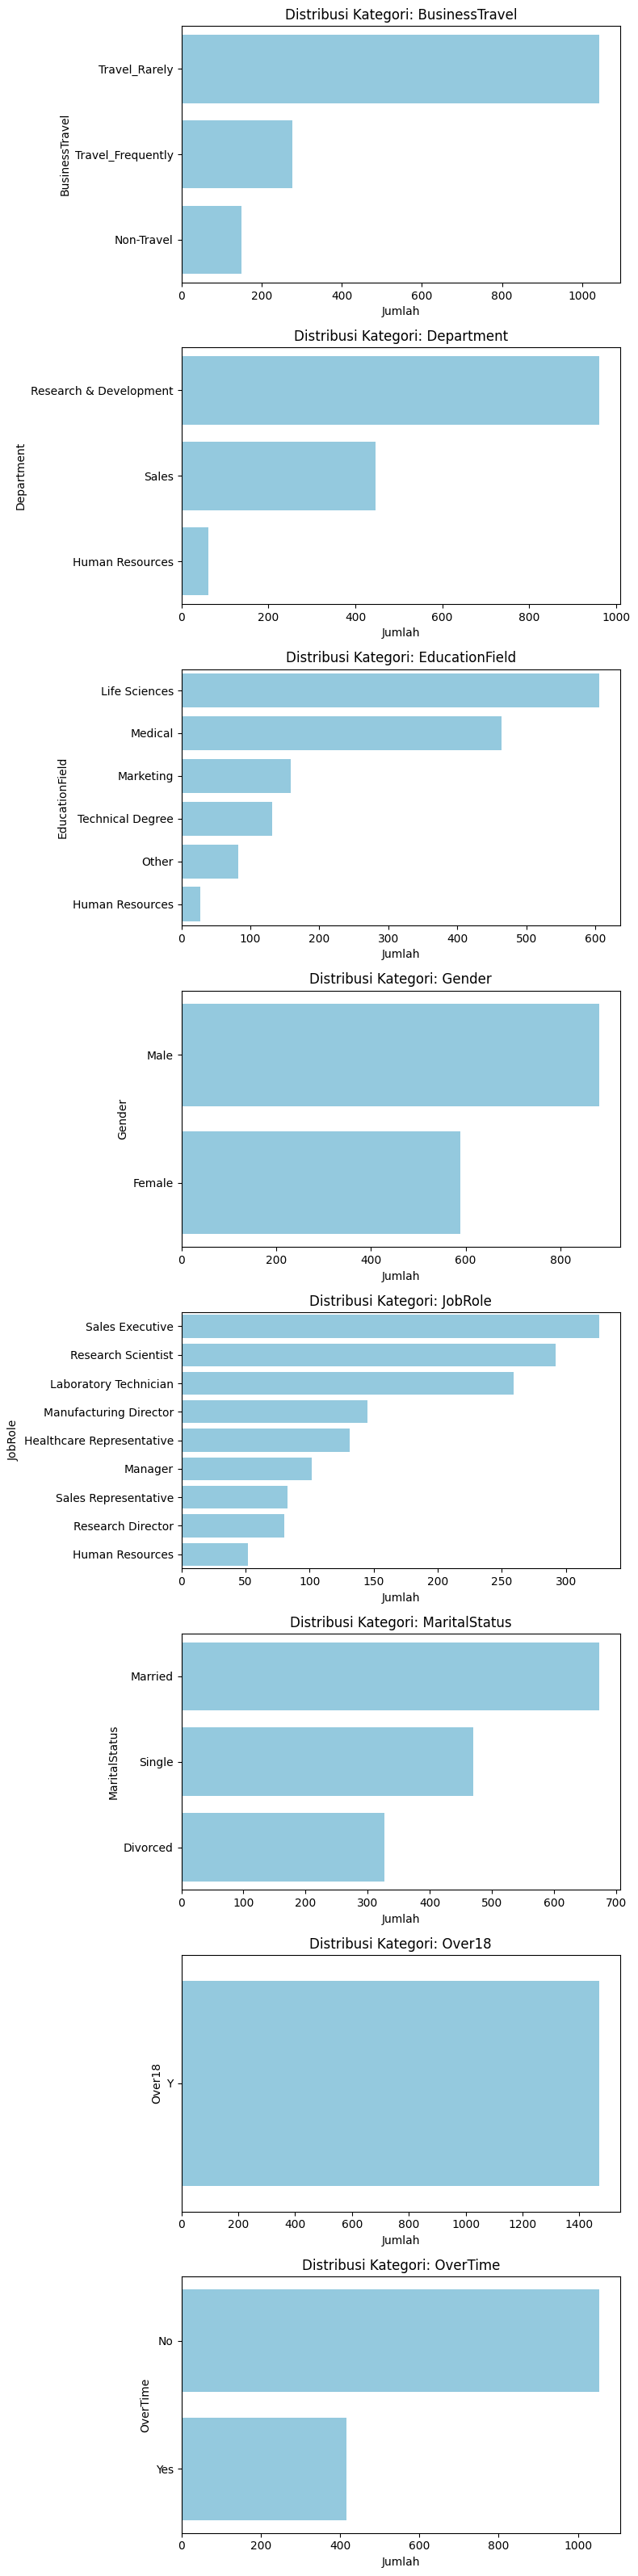

In [14]:
# Plot distribusi kategori
categorical_cols = df.select_dtypes(include=['object']).columns

num_plots = len(categorical_cols)

fig, axes = plt.subplots(nrows=num_plots, figsize=(8, 4 * num_plots))

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()

    sns.barplot(
        x=value_counts.values,
        y=value_counts.index,
        color='skyblue',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribusi Kategori: {col}')
    axes[i].set_xlabel('Jumlah')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

#### Multivariate Anaylisis

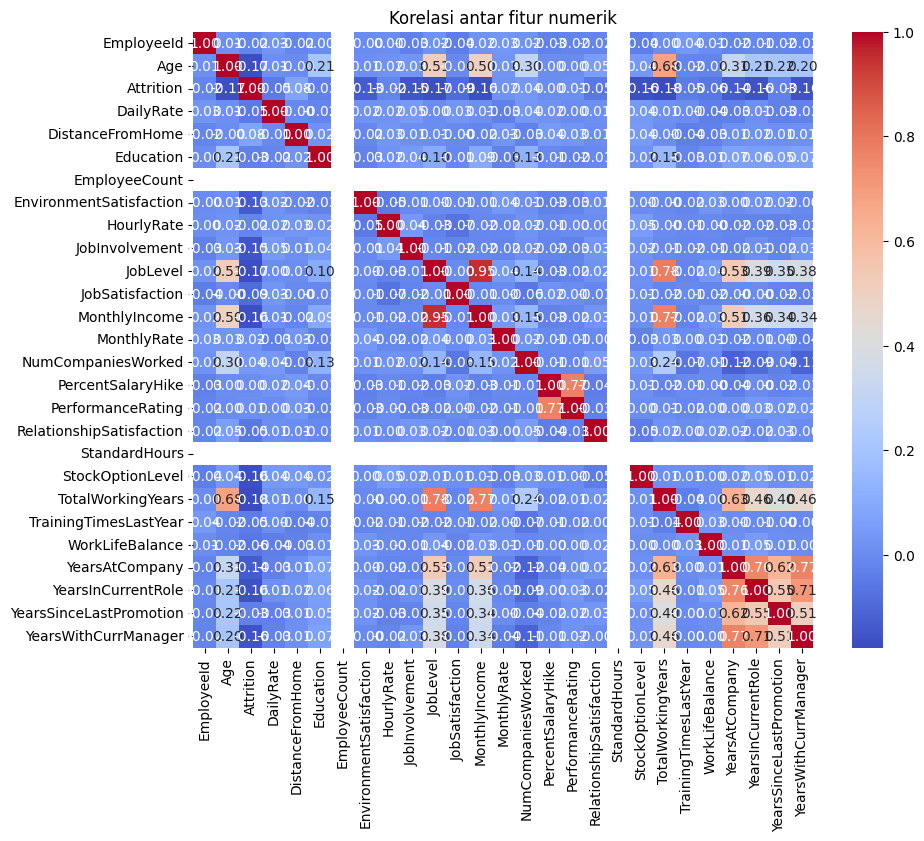

In [15]:
# Korelasi antar kolom numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antar fitur numerik')
plt.show()

**Insights**:

- Tidak ada korelasi kuat langsung ke attrition → Butuh eksplorasi lebih lanjut dengan fitur kategorikal.
- Variabel numerik paling “menarik” untuk attrition: Age, YearsAtCompany, NumCompaniesWorked, dan DistanceFromHome.

## Data Preparation / Preprocessing

In [16]:
preparation_df = df.copy()

In [17]:
# Menghapus kolom dengan missing value
preparation_df.dropna(inplace=True)

In [18]:
# Save dataframe ke file csv untuk keperluan dashboard analysis
preparation_df.to_csv('employee_clean.csv', index=False)

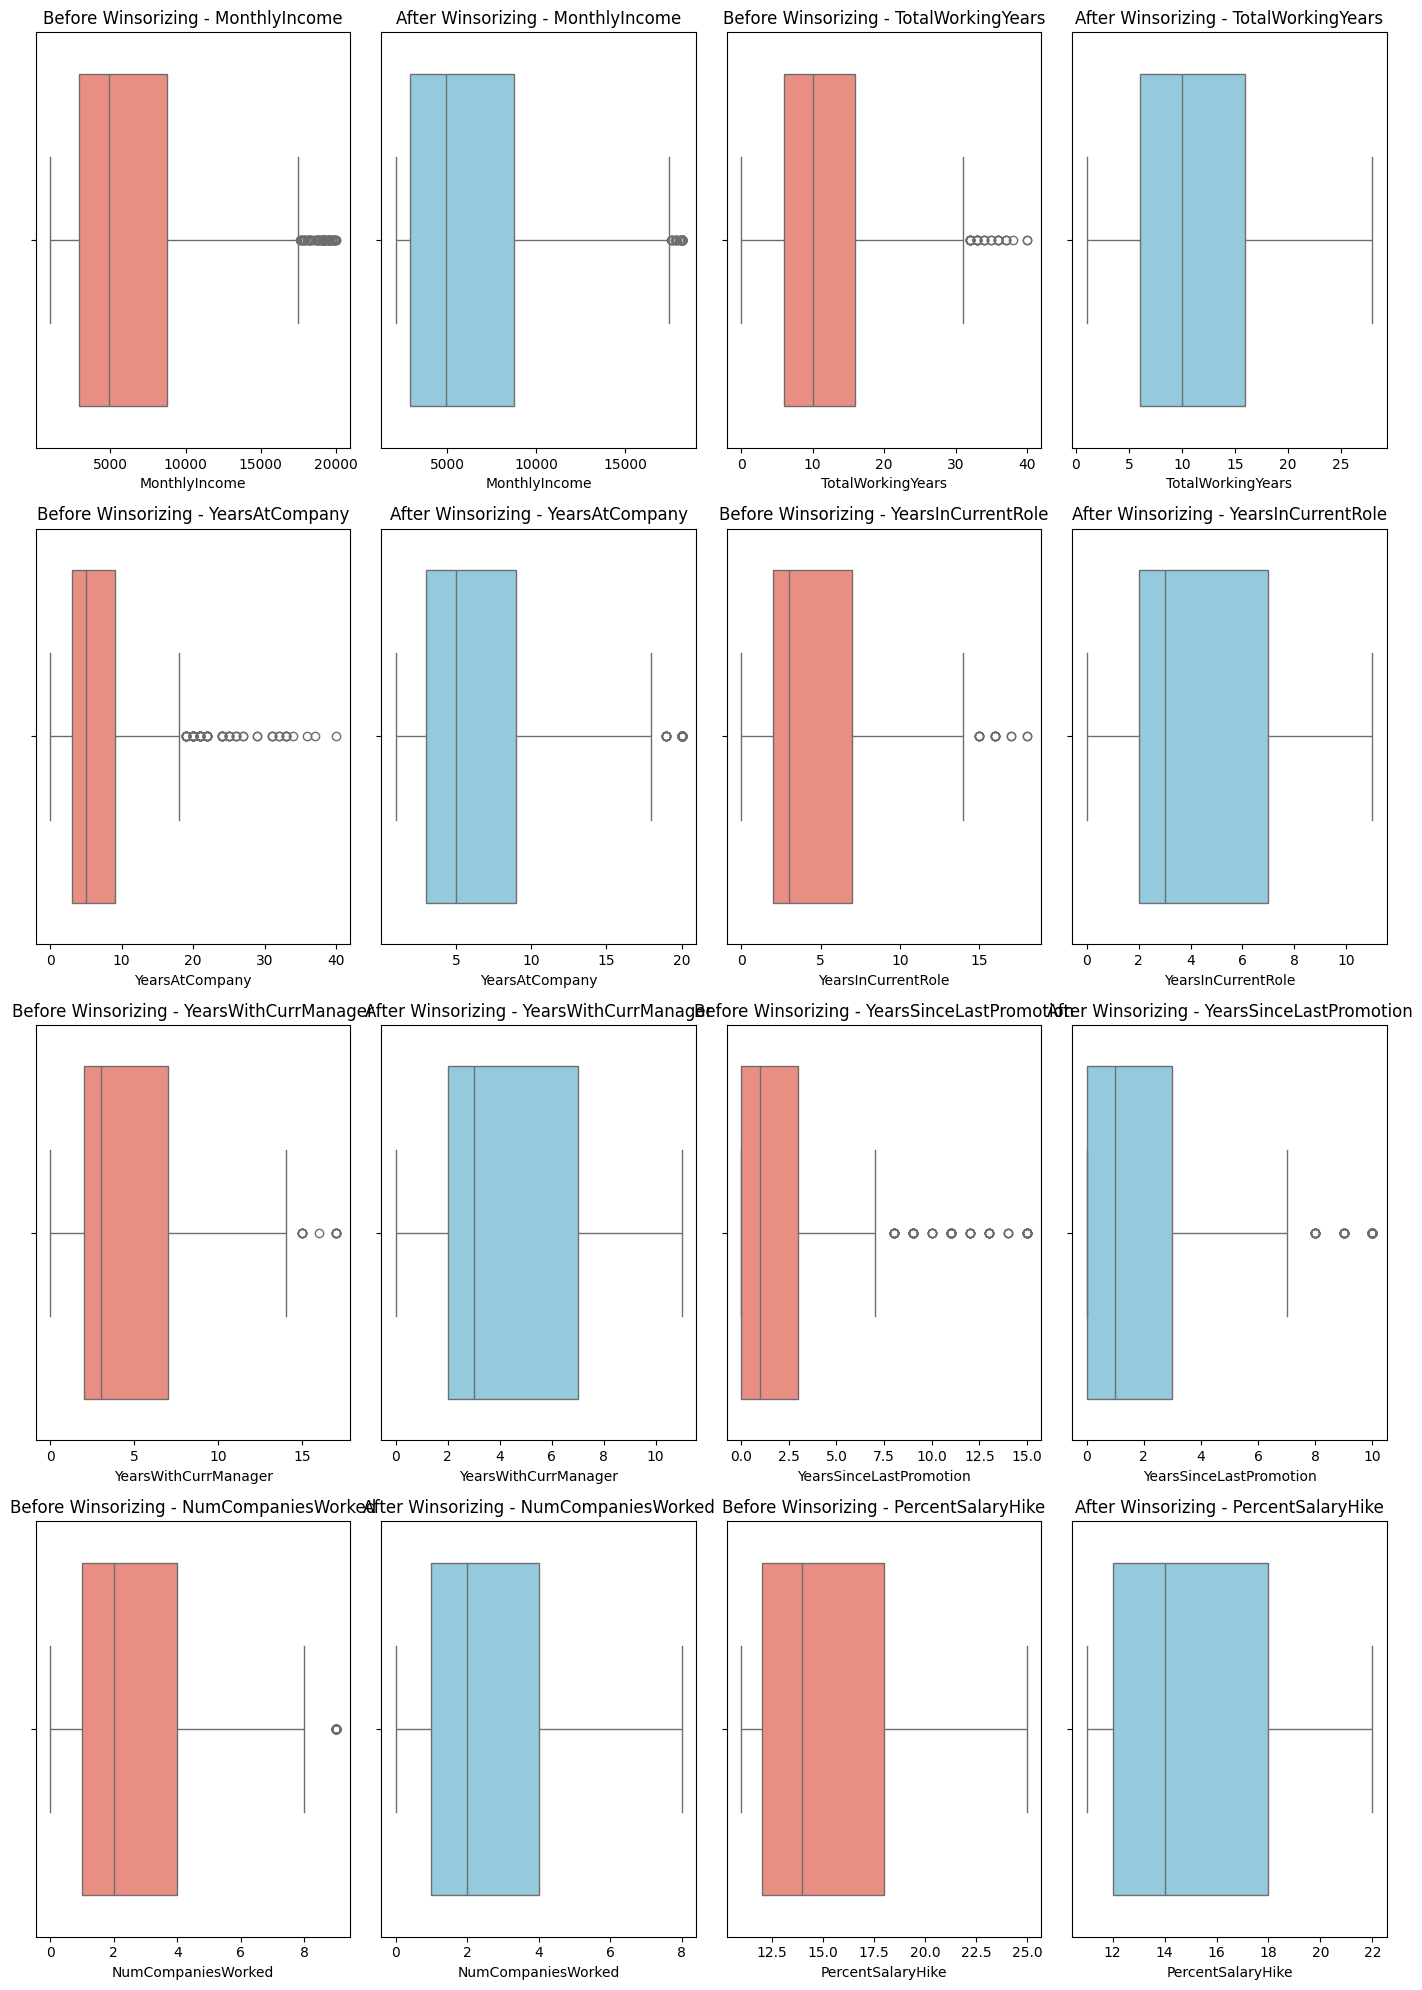

In [19]:
# Salin dataframe dulu biar bisa dibandingkan
df_winsor = preparation_df.copy()

# Kolom yang ingin ditangani outliers-nya
cols_with_outliers = [
    'MonthlyIncome',
    'TotalWorkingYears',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsWithCurrManager',
    'YearsSinceLastPromotion',
    'NumCompaniesWorked',
    'PercentSalaryHike'
]

# Winsorizing (5% bawah dan atas)
for col in cols_with_outliers:
    df_winsor[col] = winsorize(df_winsor[col], limits=[0.05, 0.05])

# Mengatur ukuran figure (jumlah baris disesuaikan dengan jumlah kolom)
n_cols = 2
n_rows = (len(cols_with_outliers) + 1) // n_cols
plt.figure(figsize=(14, 5 * n_rows))

for i, col in enumerate(cols_with_outliers):
    # Sebelum Winsorizing
    plt.subplot(n_rows, n_cols * 2, i * 2 + 1)
    sns.boxplot(x=preparation_df[col], color='salmon')
    plt.title(f"Before Winsorizing - {col}")

    # Setelah Winsorizing
    plt.subplot(n_rows, n_cols * 2, i * 2 + 2)
    sns.boxplot(x=df_winsor[col], color='skyblue')
    plt.title(f"After Winsorizing - {col}")

plt.tight_layout()
plt.show()

In [20]:
df_encoded = preparation_df.copy()

# Menentukan tipe data kategorik yang memiliki nilai unik maksimal 10
categorical_cols = []
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' or df_encoded[col].nunique() <= 10:
        categorical_cols.append(col)

# Label encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = df_encoded[col].astype(str)
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Menyimpan encoder

print(df_encoded.head())

   EmployeeId  Age  Attrition  BusinessTravel  DailyRate  Department  \
1           2   37          1               2       1141           1   
2           3   51          1               2       1323           1   
3           4   42          0               1        555           2   
6           7   40          0               2       1124           2   
7           8   55          1               2        725           1   

   DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
1                11          1               3              0  ...   
2                 4          3               1              0  ...   
3                26          2               2              0  ...   
6                 1          1               3              0  ...   
7                 2          2               3              0  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
1                         0              0                 0   
2                 

In [ ]:
# Feature selection
# Mengecek feature importance
# Memisahkan fitur kategorikal dan numerikal berdasarkan unique values
categorical_cols = []
numerical_cols = []

for col in df_encoded.columns:
    if col not in ['EmployeeId', 'Attrition']:
        if df_encoded[col].nunique() <= 10:
            categorical_cols.append(col)
        else:
            numerical_cols.append(col)

# === CHI-SQUARE TEST ===
print("=== CHI-SQUARE TEST ===")
for col in categorical_cols:
    try:
        table = pd.crosstab(df_encoded['Attrition'], df_encoded[col])
        chi2, p, dof, expected = chi2_contingency(table)
        print(f"{col}: p-value = {p:.5f} {'< 0.05 ✅' if p < 0.05 else '>= 0.05 ❌'}")
    except Exception as e:
        print(f"{col}: Error - {e}")

# === T-TEST ===
print("\n=== T-TEST ===")
for col in numerical_cols:
    try:
        resign = df_encoded[df_encoded['Attrition'] == 1][col]
        stay = df_encoded[df_encoded['Attrition'] == 0][col]
        t_stat, p = ttest_ind(resign, stay, equal_var=False)
        print(f"{col}: p-value = {p:.5f} {'< 0.05 ✅' if p < 0.05 else '>= 0.05 ❌'}")
    except Exception as e:
        print(f"{col}: Error - {e}")

=== CHI-SQUARE TEST ===
BusinessTravel: p-value = 0.00123 < 0.05 ✅
Department: p-value = 0.09890 >= 0.05 ❌
Education: p-value = 0.27533 >= 0.05 ❌
EducationField: p-value = 0.08076 >= 0.05 ❌
EmployeeCount: p-value = 1.00000 >= 0.05 ❌
EnvironmentSatisfaction: p-value = 0.00007 < 0.05 ✅
Gender: p-value = 0.66464 >= 0.05 ❌
JobInvolvement: p-value = 0.00000 < 0.05 ✅
JobLevel: p-value = 0.00000 < 0.05 ✅
JobRole: p-value = 0.00000 < 0.05 ✅
JobSatisfaction: p-value = 0.00430 < 0.05 ✅
MaritalStatus: p-value = 0.00000 < 0.05 ✅
NumCompaniesWorked: p-value = 0.03516 < 0.05 ✅
Over18: p-value = 1.00000 >= 0.05 ❌
OverTime: p-value = 0.00000 < 0.05 ✅
PerformanceRating: p-value = 0.89063 >= 0.05 ❌
RelationshipSatisfaction: p-value = 0.09326 >= 0.05 ❌
StandardHours: p-value = 1.00000 >= 0.05 ❌
StockOptionLevel: p-value = 0.00000 < 0.05 ✅
TrainingTimesLastYear: p-value = 0.15897 >= 0.05 ❌
WorkLifeBalance: p-value = 0.00703 < 0.05 ✅

=== T-TEST ===
Age: p-value = 0.00000 < 0.05 ✅
DailyRate: p-value = 0.09

Berdasarkan feature importance di atas, berikut fitur yang akan digunakan:

- JobRole
- OverTime
- MaritalStatus
- JobSatisfaction
- DistanceFromHome
- MonthlyIncome
- YearsAtCompany
- Attrition (target)

In [22]:
# Menyimpan fitur ke dalam dataframe baru
selected = ['JobRole', 'OverTime', 'MaritalStatus', 'JobSatisfaction', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany', 'Attrition']
df_selected = df_encoded[selected].copy()

df_selected.head()

,JobRole,OverTime,MaritalStatus,JobSatisfaction,DistanceFromHome,MonthlyIncome,YearsAtCompany,Attrition
1,0,0,1,1,11,4777,1,1
2,6,1,1,2,4,2461,10,1
3,7,0,1,1,26,13525,20,0
6,7,1,1,3,1,7457,4,0
7,3,1,1,0,2,19859,5,1


In [23]:
# Splitting Data
X = df_selected.drop('Attrition', axis=1)
y = df_selected['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

## Modeling

In [24]:
# Dictionary untuk menyimpan model
models = {
    'logistic_regression': LogisticRegression(max_iter=1000),
    'decision_tree': DecisionTreeClassifier(random_state=42),
    'random_forest': RandomForestClassifier(random_state=42)
}

# Training model
for name, model in models.items():
    model.fit(X_train, y_train)
    with open(f'{name}_model.pkl', 'wb') as file:
        pickle.dump(model, file)
    print(f"Model '{name}' disimpan ke {name}_model.pkl")

Model 'logistic_regression' disimpan ke logistic_regression_model.pkl
Model 'decision_tree' disimpan ke decision_tree_model.pkl
Model 'random_forest' disimpan ke random_forest_model.pkl


## Evaluation

In [25]:
# Evaluasi model yang sudah disimpan
model_scores = {}

for name in models.keys():
    # Load model dari file
    with open(f'{name}_model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)

    # Predict
    y_pred = loaded_model.predict(X_test)

    # Hitung akurasi
    acc = accuracy_score(y_test, y_pred)
    model_scores[name] = acc

    # Tampilkan hasil evaluasi
    print(f"\n=== Evaluasi Model: {name.replace('_', ' ').title()} ===")
    print(f"Akurasi: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# Menentukan model terbaik
best_model_name = max(model_scores, key=model_scores.get)
best_score = model_scores[best_model_name]

print(f"\nModel terbaik: {best_model_name.replace('_', ' ').title()} (akurasi {best_score:.4f})")


=== Evaluasi Model: Logistic Regression ===
Akurasi: 0.8396
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       176
           1       0.60      0.17      0.26        36

    accuracy                           0.84       212
   macro avg       0.73      0.57      0.59       212
weighted avg       0.81      0.84      0.80       212


=== Evaluasi Model: Decision Tree ===
Akurasi: 0.7453
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       176
           1       0.33      0.50      0.40        36

    accuracy                           0.75       212
   macro avg       0.61      0.65      0.62       212
weighted avg       0.79      0.75      0.76       212


=== Evaluasi Model: Random Forest ===
Akurasi: 0.8443
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       176
           1       0.62      0.22      0.33        36

    accurac

## Menyimpan model dan encoder

In [26]:
# Menyimpan label_encoders ke file
with open('label_encoders.pkl', 'wb') as file:
    pickle.dump(label_encoders, file)

In [27]:
# Save model terbaik
with open(f'{best_model_name}_model.pkl', 'rb') as file:
    best_model = pickle.load(file)